In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv("data.csv")
df.head()
X = df.drop("label", axis=1)
y = df["label"]
y_values = y.astype('category').values.categories
y_values

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape(X_train.shape[0], 45, 45)
X_test = X_test.reshape(X_test.shape[0], 45, 45)


NameError: name 'train_test_split' is not defined

In [3]:
X_train.shape, X_test.shape #from here we see that the size is 45 x 45

NameError: name 'X_train' is not defined

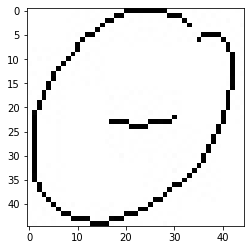

In [6]:
indx = 1012
image = X_train[indx]
plt.imshow(image, cmap="Greys")
plt.show()

In [14]:
img_rows, img_cols = 45, 45
# keras takes the input in the format M x N x 1
X_train  = X_train.reshape(X_train.shape[0],img_rows, img_cols, 1 )
X_test = X_test.reshape(X_test.shape[0],img_rows, img_cols, 1 )

X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)

#normalising pixel value by 255 (RGB value ranges 0 to 255) but we want to range 0 to 1
X_train /= 255
X_test /= 255

In [74]:
y_train = y_train.replace(to_replace=y_values, value=[i for i in range(y_values.size)])
y_test = y_test.replace(to_replace=y_values, value=[i for i in range(y_values.size)])
y_train = np.array(y_train)
y_test = np.array(y_test)

In [1]:
from keras.utils import to_categorical

print(y_values)
numb_cla = y_values.size #because we have y_values.size digits, and we wish to have a class matrix

y_train = to_categorical(y_train, numb_cla )
y_test = to_categorical(y_test, numb_cla )

Using TensorFlow backend.
C:\Users\mltam\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mltam\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mltam\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mltam\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

NameError: name 'y_values' is not defined

In [47]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense

In [48]:
model = Sequential() #initialize a sequential model - creates an empty model
m2 = Sequential()

In [49]:
 #we add a convolutional layer which takes the input image
model.add(Conv2D(32, kernel_size = (3, 3), activation = "relu", input_shape=(img_rows, img_cols, 1)))


In [50]:
# Flattening ata into a 1D array
model.add(Flatten())
m2.add(Flatten())

In [51]:
# Adding the final dense layer, this step is essential
model.add(Dense(numb_cla, activation="softmax"))
m2.add(Dense(numb_cla, activation="softmax"))

In [52]:
#Compliling the model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics = ["accuracy"]) 
m2.compile(loss='categorical_crossentropy', optimizer="adam", metrics = ["accuracy"])

In [53]:
# Fitting model to data
model.fit(X_train, y_train, validation_data=(X_test, y_test))
m2.fit(X_train, y_train, validation_data=(X_test, y_test))

Train on 1895 samples, validate on 934 samples
Epoch 1/1
1895/1895 [==============================] - 1s 677us/step - loss: 0.3466 - accuracy: 0.9029 - val_loss: 0.1322 - val_accuracy: 0.9636
Train on 1895 samples, validate on 934 samples
Epoch 1/1
1895/1895 [==============================] - 0s 125us/step - loss: 0.9791 - accuracy: 0.7398 - val_loss: 0.5535 - val_accuracy: 0.9133


In [54]:
# Getting test loss and accurary scores
score = model.evaluate(X_test, y_test, verbose = 0)
score2 = m2.evaluate(X_test, y_test, verbose = 0)

In [55]:
print(score) # loss, accurary
print(score2)

[0.13218307621154846, 0.9635974168777466]
[0.55345832420876, 0.9132762551307678]


In [56]:
model.save("test_model.h5")

## Loading model

In [57]:
from keras.models import load_model
model = load_model("test_model.h5")

In [58]:
features_numpy = X.values

my_image = features_numpy[200].reshape(45,45)

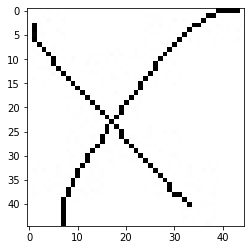

In [59]:
import matplotlib.pyplot as plt
plt.imshow(image,  cmap="Greys")
plt.show()



In [63]:
my_image = image.reshape(1, img_rows, img_cols, 1)
my_image = np.array(my_image, dtype=np.float64)

my_image /=255

In [66]:
#predict
your_first_prediction = model.predict(image)
pred = your_first_prediction.argmax()

ValueError: Error when checking input: expected conv2d_2_input to have 4 dimensions, but got array with shape (45, 45)

In [67]:
y_values[pred]

'times'